In [105]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# New Section

In [64]:
df=pd.read_csv("/content/sample_data/online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [66]:
df[df.isna().any(axis=1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


In [67]:
df=df.dropna()

In [68]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [69]:
le = LabelEncoder()
df["VisitorType"] = le.fit_transform(df["VisitorType"])
df["Month"] = le.fit_transform(df["Month"])
df["Weekend"] = le.fit_transform(df["Weekend"])
df["Revenue"] = le.fit_transform(df["Revenue"])

In [70]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [71]:
df1 = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df1['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  Weekend               

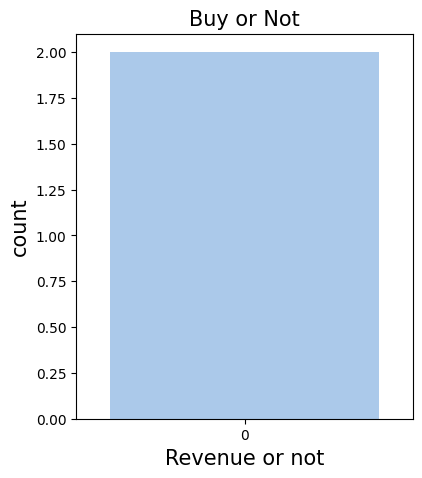

In [73]:
plt.rcParams['figure.figsize'] = (20, 5)

plt.subplot(1, 4, 1)
sns.countplot(df1['Revenue'].value_counts(), palette = 'pastel')
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [74]:
df1['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

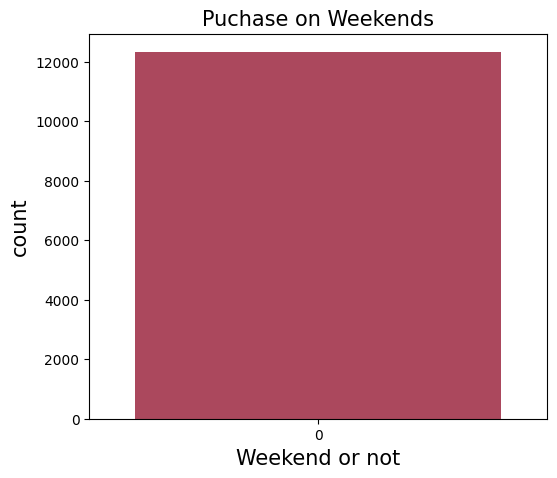

In [75]:
plt.rcParams['figure.figsize'] = (13,5)
plt.subplot(1, 2, 2)
sns.countplot(df1['Weekend'], palette = 'inferno')
plt.title('Puchase on Weekends', fontsize = 15)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

In [76]:
df1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_0', 'Month_1', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'VisitorType_0',
       'VisitorType_1', 'VisitorType_2'],
      dtype='object')

<Axes: >

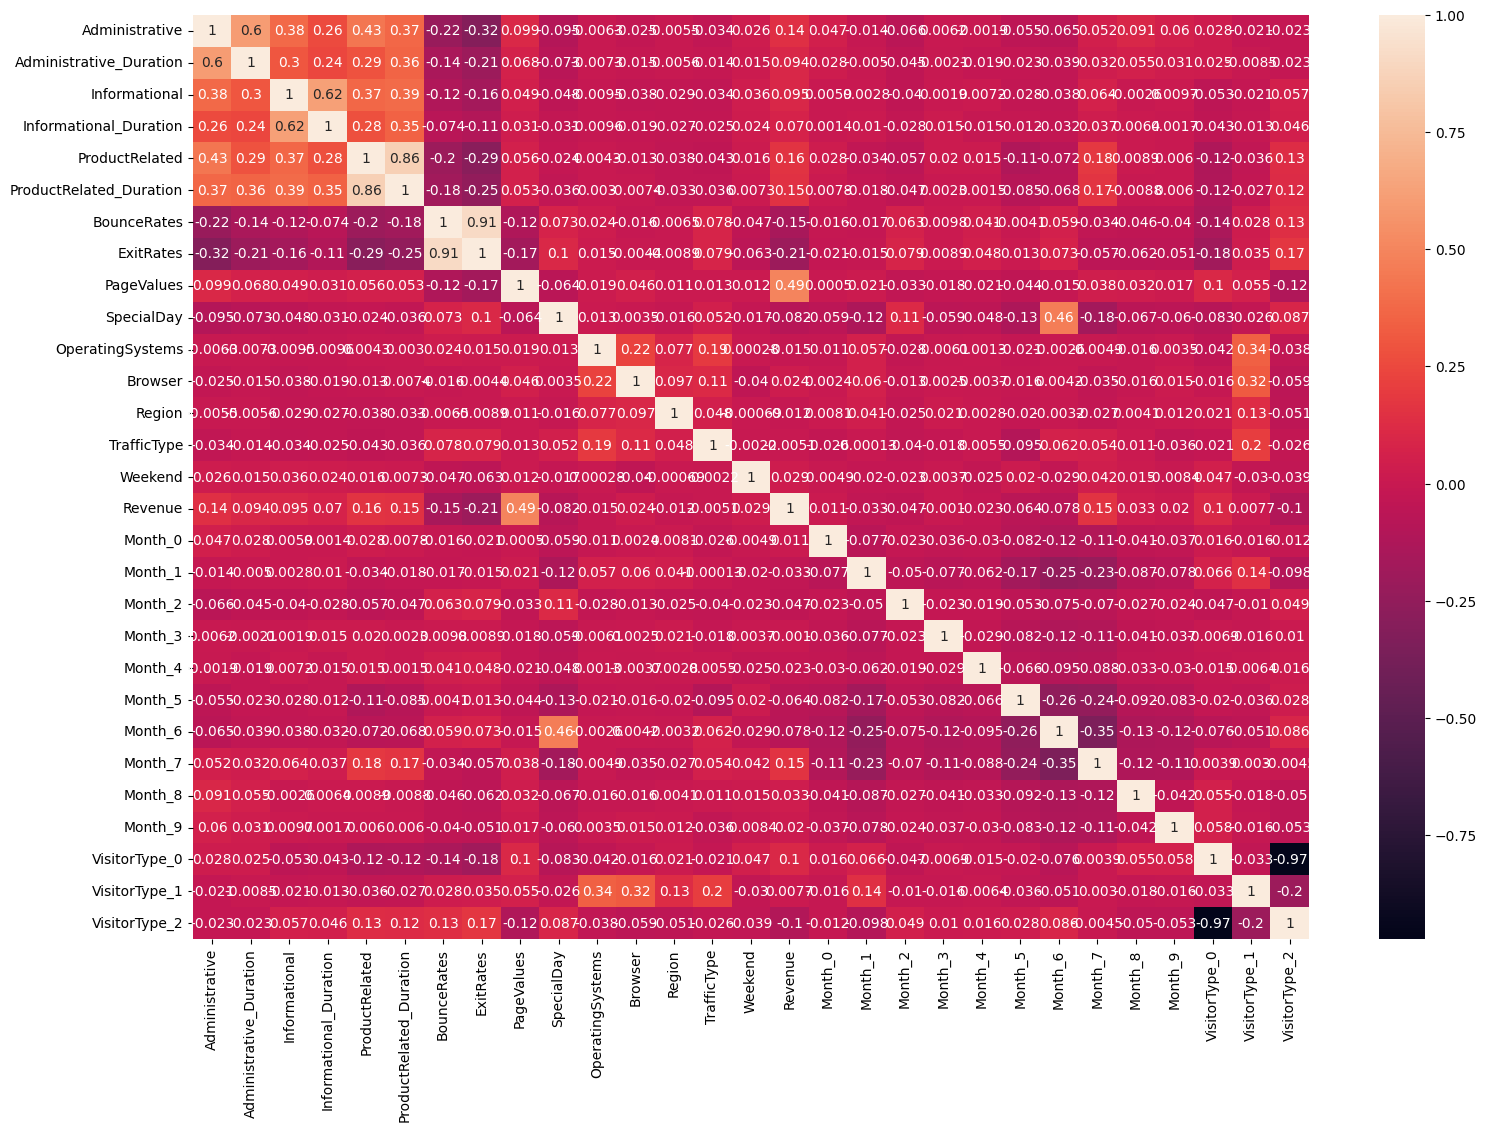

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
sns.heatmap(df1.corr(),annot=True)

In [78]:
'''
df['ProductRel_per_dur'] = df['ProductRelated']/(df['ProductRelated_Duration'])
df['Admin_per_dur'] = df['Administrative']/(df['Administrative_Duration'])
df['Inform_per_dur'] = df['Informational']/(df['Informational_Duration'])
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame
col = ['ProductRel_per_dur','PageValues','SpecialDay','Month','Admin_per_dur','Inform_per_dur','BounceRates','ExitRates',
       'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']
Df = select_columns(df,col)
plt.figure(figsize=(18,12))
sns.heatmap(Df.corr(),annot=True)
'''

"\ndf['ProductRel_per_dur'] = df['ProductRelated']/(df['ProductRelated_Duration'])\ndf['Admin_per_dur'] = df['Administrative']/(df['Administrative_Duration'])\ndf['Inform_per_dur'] = df['Informational']/(df['Informational_Duration'])\ndef select_columns(data_frame, column_names):\n    new_frame = data_frame.loc[:, column_names]\n    return new_frame\ncol = ['ProductRel_per_dur','PageValues','SpecialDay','Month','Admin_per_dur','Inform_per_dur','BounceRates','ExitRates',\n       'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']\nDf = select_columns(df,col)\nplt.figure(figsize=(18,12))\nsns.heatmap(Df.corr(),annot=True)\n"

In [80]:
X = df1.drop(['Revenue'], axis=1)
y = df1['Revenue']


In [81]:
#train data 70%
# Validation data 15%
# Test data 15%
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=10)

In [85]:
sc_X = StandardScaler()
Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

In [90]:
gbm2 = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=10,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm2.fit(X_train,y_train)
gbm2_pred = gbm2.predict(X_val)

print('Gradient Boost Performance test :')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm2_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm2_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm2_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm2_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm2_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Gradient Boost Performance test :
---------------------------------
Accuracy        :  0.8918334234721471
F1 Score        :  0.5391705069124424
Precision       :  0.9069767441860465
Recall          :  0.3836065573770492
Confusion Matrix:
  [[1532   12]
 [ 188  117]]


In [102]:
gbm2 = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm2.fit(X_train,y_train)
gbm2_pred = gbm2.predict(X_val)

print('Gradient Boost Performance test :')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm2_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm2_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm2_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm2_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm2_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Gradient Boost Performance test :
---------------------------------
Accuracy        :  0.9048134126554894
F1 Score        :  0.6716417910447762
Precision       :  0.7792207792207793
Recall          :  0.5901639344262295
Confusion Matrix:
  [[1493   51]
 [ 125  180]]


In [104]:
gb = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=130,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #final parameters
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)


print('Gradient Boost: Final  ClassificationPerformance test :')
print('-------------------------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, gb_pred))
print('F1 Score        : ', metrics.f1_score(y_test, gb_pred))
print('Precision       : ', metrics.precision_score(y_test, gb_pred))
print('Recall          : ', metrics.recall_score(y_test, gb_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred, target_names=['Rev=0', 'Rev=1']))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Gradient Boost: Final  ClassificationPerformance test :
-------------------------------------------------------
Accuracy        :  0.898918918918919
F1 Score        :  0.6297029702970297
Precision       :  0.7035398230088495
Recall          :  0.5698924731182796
Confusion Matrix:
  [[1504   67]
 [ 120  159]]
              precision    recall  f1-score   support

       Rev=0       0.93      0.96      0.94      1571
       Rev=1       0.70      0.57      0.63       279

    accuracy                           0.90      1850
   macro avg       0.81      0.76      0.79      1850
weighted avg       0.89      0.90      0.89      1850



In [108]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xg_pred= xgb.predict(X_test)
print("XGB Accuracy:{:.2f}%".format(xgb.score(X_test,y_test)*100))
print('XGBBoost: Final  ClassificationPerformance test :')
print('-------------------------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, xg_pred))
print('F1 Score        : ', metrics.f1_score(y_test, xg_pred))
print('Precision       : ', metrics.precision_score(y_test, xg_pred))
print('Recall          : ', metrics.recall_score(y_test, xg_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, xg_pred))
print(classification_report(y_test, xg_pred, target_names=['Rev=0', 'Rev=1']))



XGB Accuracy:89.08%
XGBBoost: Final  ClassificationPerformance test :
-------------------------------------------------------
Accuracy        :  0.8908108108108108
F1 Score        :  0.6130268199233717
Precision       :  0.6584362139917695
Recall          :  0.5734767025089605
Confusion Matrix:
  [[1488   83]
 [ 119  160]]
              precision    recall  f1-score   support

       Rev=0       0.93      0.95      0.94      1571
       Rev=1       0.66      0.57      0.61       279

    accuracy                           0.89      1850
   macro avg       0.79      0.76      0.77      1850
weighted avg       0.89      0.89      0.89      1850

